In [1]:
import numpy as np
import pandas as pd
import calendar
import matplotlib.pyplot as plt

In [2]:
from segmentation import draw_plot, draw_segments
from segmentation import sliding_window, bottomupsegment, swab
from segmentation import sumsquared_error, regression, compute_error

### COVID Dataset

In [3]:
#Import Covid Dataset

ds_covid = pd.read_csv("Data/COVID/owid-covid-data.csv")
#If missing values: Interpolate: ds_covid = ds_covid.interpolate(method='nearest')
ds_covid = ds_covid.fillna(0)
ds_covid.date = pd.to_datetime(ds_covid.date)
ds_covid['month'] = pd.DatetimeIndex(ds_covid['date']).month
ds_covid['month'] = ds_covid['month'].apply(lambda x: calendar.month_name[x])
ds_covid['year'] = pd.DatetimeIndex(ds_covid['date']).year
ds_covid.set_index(['date'],inplace=True)

In [4]:
countries = ['USA', 'IND', 'BRA', 'RUS', 'GBR', 'FRA', 'ESP', 'ITA' , 'TUR',  'DEU']

iso = 'USA'
country = ds_covid[ds_covid['iso_code']==iso][['new_cases','month', 'year']].reset_index().drop(columns=['date'])
country_cases_raw = country['new_cases'].tolist()

#Log-normalize data
trans = np.ma.log(country_cases_raw)
country_cases = trans.filled(0)

In [5]:
error_dict_covid = {}
for error in np.arange(0.25,5.25,0.125):
    print("For error: ", error)
    sliding_window_data = sliding_window(country_cases, max_error = error)
    print("Sliding Window Done")
    bottom_up_data = bottomupsegment(country_cases, regression, sumsquared_error, max_error=error)
    print("Bottom Up Done")
    swab_data = swab(country_cases, buffer_percent=0.1, bottom_up_error = error, best_line_error = error)
    print("SWAB Done")
    sw_error = compute_error(country_cases, sliding_window_data)
    bu_error = compute_error(country_cases, bottom_up_data)
    swab_error = compute_error(country_cases, swab_data)
    print("Errors Computed")
    error_dict_covid[error] = {"SW": sw_error, "BU": bu_error, "SWAB": swab_error}

For error:  0.25
Sliding Window Done


/home/mandarsharma/Segmentation/segmentation.py:28: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  (p,residuals,rank,s) = np.linalg.lstsq(A,y)


Bottom Up Done
SWAB Done
Errors Computed
For error:  0.375
Sliding Window Done
Bottom Up Done
SWAB Done
Errors Computed
For error:  0.5
Sliding Window Done
Bottom Up Done
SWAB Done
Errors Computed
For error:  0.625
Sliding Window Done
Bottom Up Done
SWAB Done
Errors Computed
For error:  0.75
Sliding Window Done
Bottom Up Done
SWAB Done
Errors Computed
For error:  0.875
Sliding Window Done
Bottom Up Done
SWAB Done
Errors Computed
For error:  1.0
Sliding Window Done
Bottom Up Done
SWAB Done
Errors Computed
For error:  1.125
Sliding Window Done
Bottom Up Done
SWAB Done
Errors Computed
For error:  1.25
Sliding Window Done
Bottom Up Done
SWAB Done
Errors Computed
For error:  1.375
Sliding Window Done
Bottom Up Done
SWAB Done
Errors Computed
For error:  1.5
Sliding Window Done
Bottom Up Done
SWAB Done
Errors Computed
For error:  1.625
Sliding Window Done
Bottom Up Done
SWAB Done
Errors Computed
For error:  1.75
Sliding Window Done
Bottom Up Done
SWAB Done
Errors Computed
For error:  1.875
Sl

In [6]:
error_axis = []
sw_error_c = []
sw_seg_c = []
bu_error_c = []
bu_seg_c = []
swab_error_c = []
swab_seg_c = []

for k,v in error_dict_covid.items():
    error_axis.append(k)
    sw_error_c.append(v['SW'][0])
    sw_seg_c.append(v['SW'][1])
    bu_error_c.append(v['BU'][0])
    bu_seg_c.append(v['BU'][1])
    swab_error_c.append(v['SWAB'][0])
    swab_seg_c.append(v['SWAB'][1])

### DOTS

In [ ]:
#Import DOTS Dataset
ds_dots = pd.read_csv("Data/DOTS/Exports.csv")
countries = ['United States', 'India', 'Brazil', 'USSR', 'United Kingdom', 'France', 'Spain', 'Italy' , 'Turkey', 'Germany']

In [ ]:
#Load and Process Data
country = ds_dots.loc[ds_dots['Location'] == countries[0]]
time = country.columns.tolist()[1:]
for row in country.iterrows():
    values = row[1]
values = [str(x) for x in values]
values = [float(re.sub(',', '', x)) for x in values[1:]]
time = [re.sub('M', '-', x) for x in time]
country = pd.DataFrame(list(zip(time, values)), columns = ['Date', 'Exports'])

country = country.fillna(0)
country.Date = pd.to_datetime(country.Date)
country['month'] = pd.DatetimeIndex(country['Date']).month
country['month'] = country['month'].apply(lambda x: calendar.month_name[x])
country['year'] = pd.DatetimeIndex(country['Date']).year
country.set_index(['Date'],inplace=True)

country = country[['Exports','month', 'year']].reset_index().drop(columns=['Date'])
country_exports_raw = country['Exports'].tolist()

#Log-normalize data
trans = np.ma.log(country_exports_raw)
country_exports = trans.filled(0)

error_dict_export = {}
for error in np.arange(0.25,5.25,0.125):
    print("For error: ", error)
    sliding_window_data = sliding_window(country_exports, max_error = error)
    print("Sliding Window Done")
    bottom_up_data = bottomupsegment(country_exports, regression, sumsquared_error, max_error=error)
    print("Bottom Up Done")
    swab_data = swab(country_exports, buffer_percent=0.1, bottom_up_error = error, best_line_error = error)
    print("SWAB Done")
    sw_error = compute_error(country_exports, sliding_window_data)
    bu_error = compute_error(country_exports, bottom_up_data)
    swab_error = compute_error(country_exports, swab_data)
    print("Errors Computed")
    error_dict_export[error] = {"SW": sw_error, "BU": bu_error, "SWAB": swab_error}



In [12]:
sw_error_e = []
sw_seg_e = []
bu_error_e = []
bu_seg_e = []
swab_error_e = []
swab_seg_e = []

for k,v in error_dict_export.items():
    sw_error_e.append(v['SW'][0])
    sw_seg_e.append(v['SW'][1])
    bu_error_e.append(v['BU'][0])
    bu_seg_e.append(v['BU'][1])
    swab_error_e.append(v['SWAB'][0])
    swab_seg_e.append(v['SWAB'][1])

### Pollution

In [ ]:
#Import US Pollution Dataset
ds_poll = pd.read_csv("Data/USPollution/USPollution.csv")
ds_poll = ds_poll.dropna()
ds_poll['Date Local'] = pd.to_datetime(ds_poll['Date Local'])
ds_poll['month'] = pd.DatetimeIndex(ds_poll['Date Local']).month
ds_poll['month'] = ds_poll['month'].apply(lambda x: calendar.month_name[x])
ds_poll['year'] = pd.DatetimeIndex(ds_poll['Date Local']).year
ds_poll.set_index(['Date Local'],inplace=True)

In [ ]:
location = ds_poll[ds_poll['State Code']==1]['State'].iloc[[1]][0]
print("Processing State: ", location)
country = ds_poll[ds_poll['State Code']==1][['CO Mean','month', 'year']].reset_index().drop(columns=['Date Local'])
country_poll = country['CO Mean'].tolist()

In [ ]:
error_dict_poll = {}
for error in np.arange(0.25,5.25,0.125):
    print("For error: ", error)
    sliding_window_data = sliding_window(country_poll, max_error = error)
    print("Sliding Window Done")
    bottom_up_data = bottomupsegment(country_poll, regression, sumsquared_error, max_error=error)
    print("Bottom Up Done")
    swab_data = swab(country_poll, buffer_percent=0.1, bottom_up_error = error, best_line_error = error)
    print("SWAB Done")
    sw_error = compute_error(country_poll, sliding_window_data)
    bu_error = compute_error(country_poll, bottom_up_data)
    swab_error = compute_error(country_poll, swab_data)
    print("Errors Computed")
    error_dict_poll[error] = {"SW": sw_error, "BU": bu_error, "SWAB": swab_error}

In [13]:
sw_error_poll = []
sw_seg_poll = []
bu_error_poll = []
bu_seg_poll = []
swab_error_poll = []
swab_seg_poll = []

for k,v in error_dict_poll.items():
    sw_error_poll.append(v['SW'][0])
    sw_seg_poll.append(v['SW'][1])
    bu_error_poll.append(v['BU'][0])
    bu_seg_poll.append(v['BU'][1])
    swab_error_poll.append(v['SWAB'][0])
    swab_seg_poll.append(v['SWAB'][1])

### Visualizations

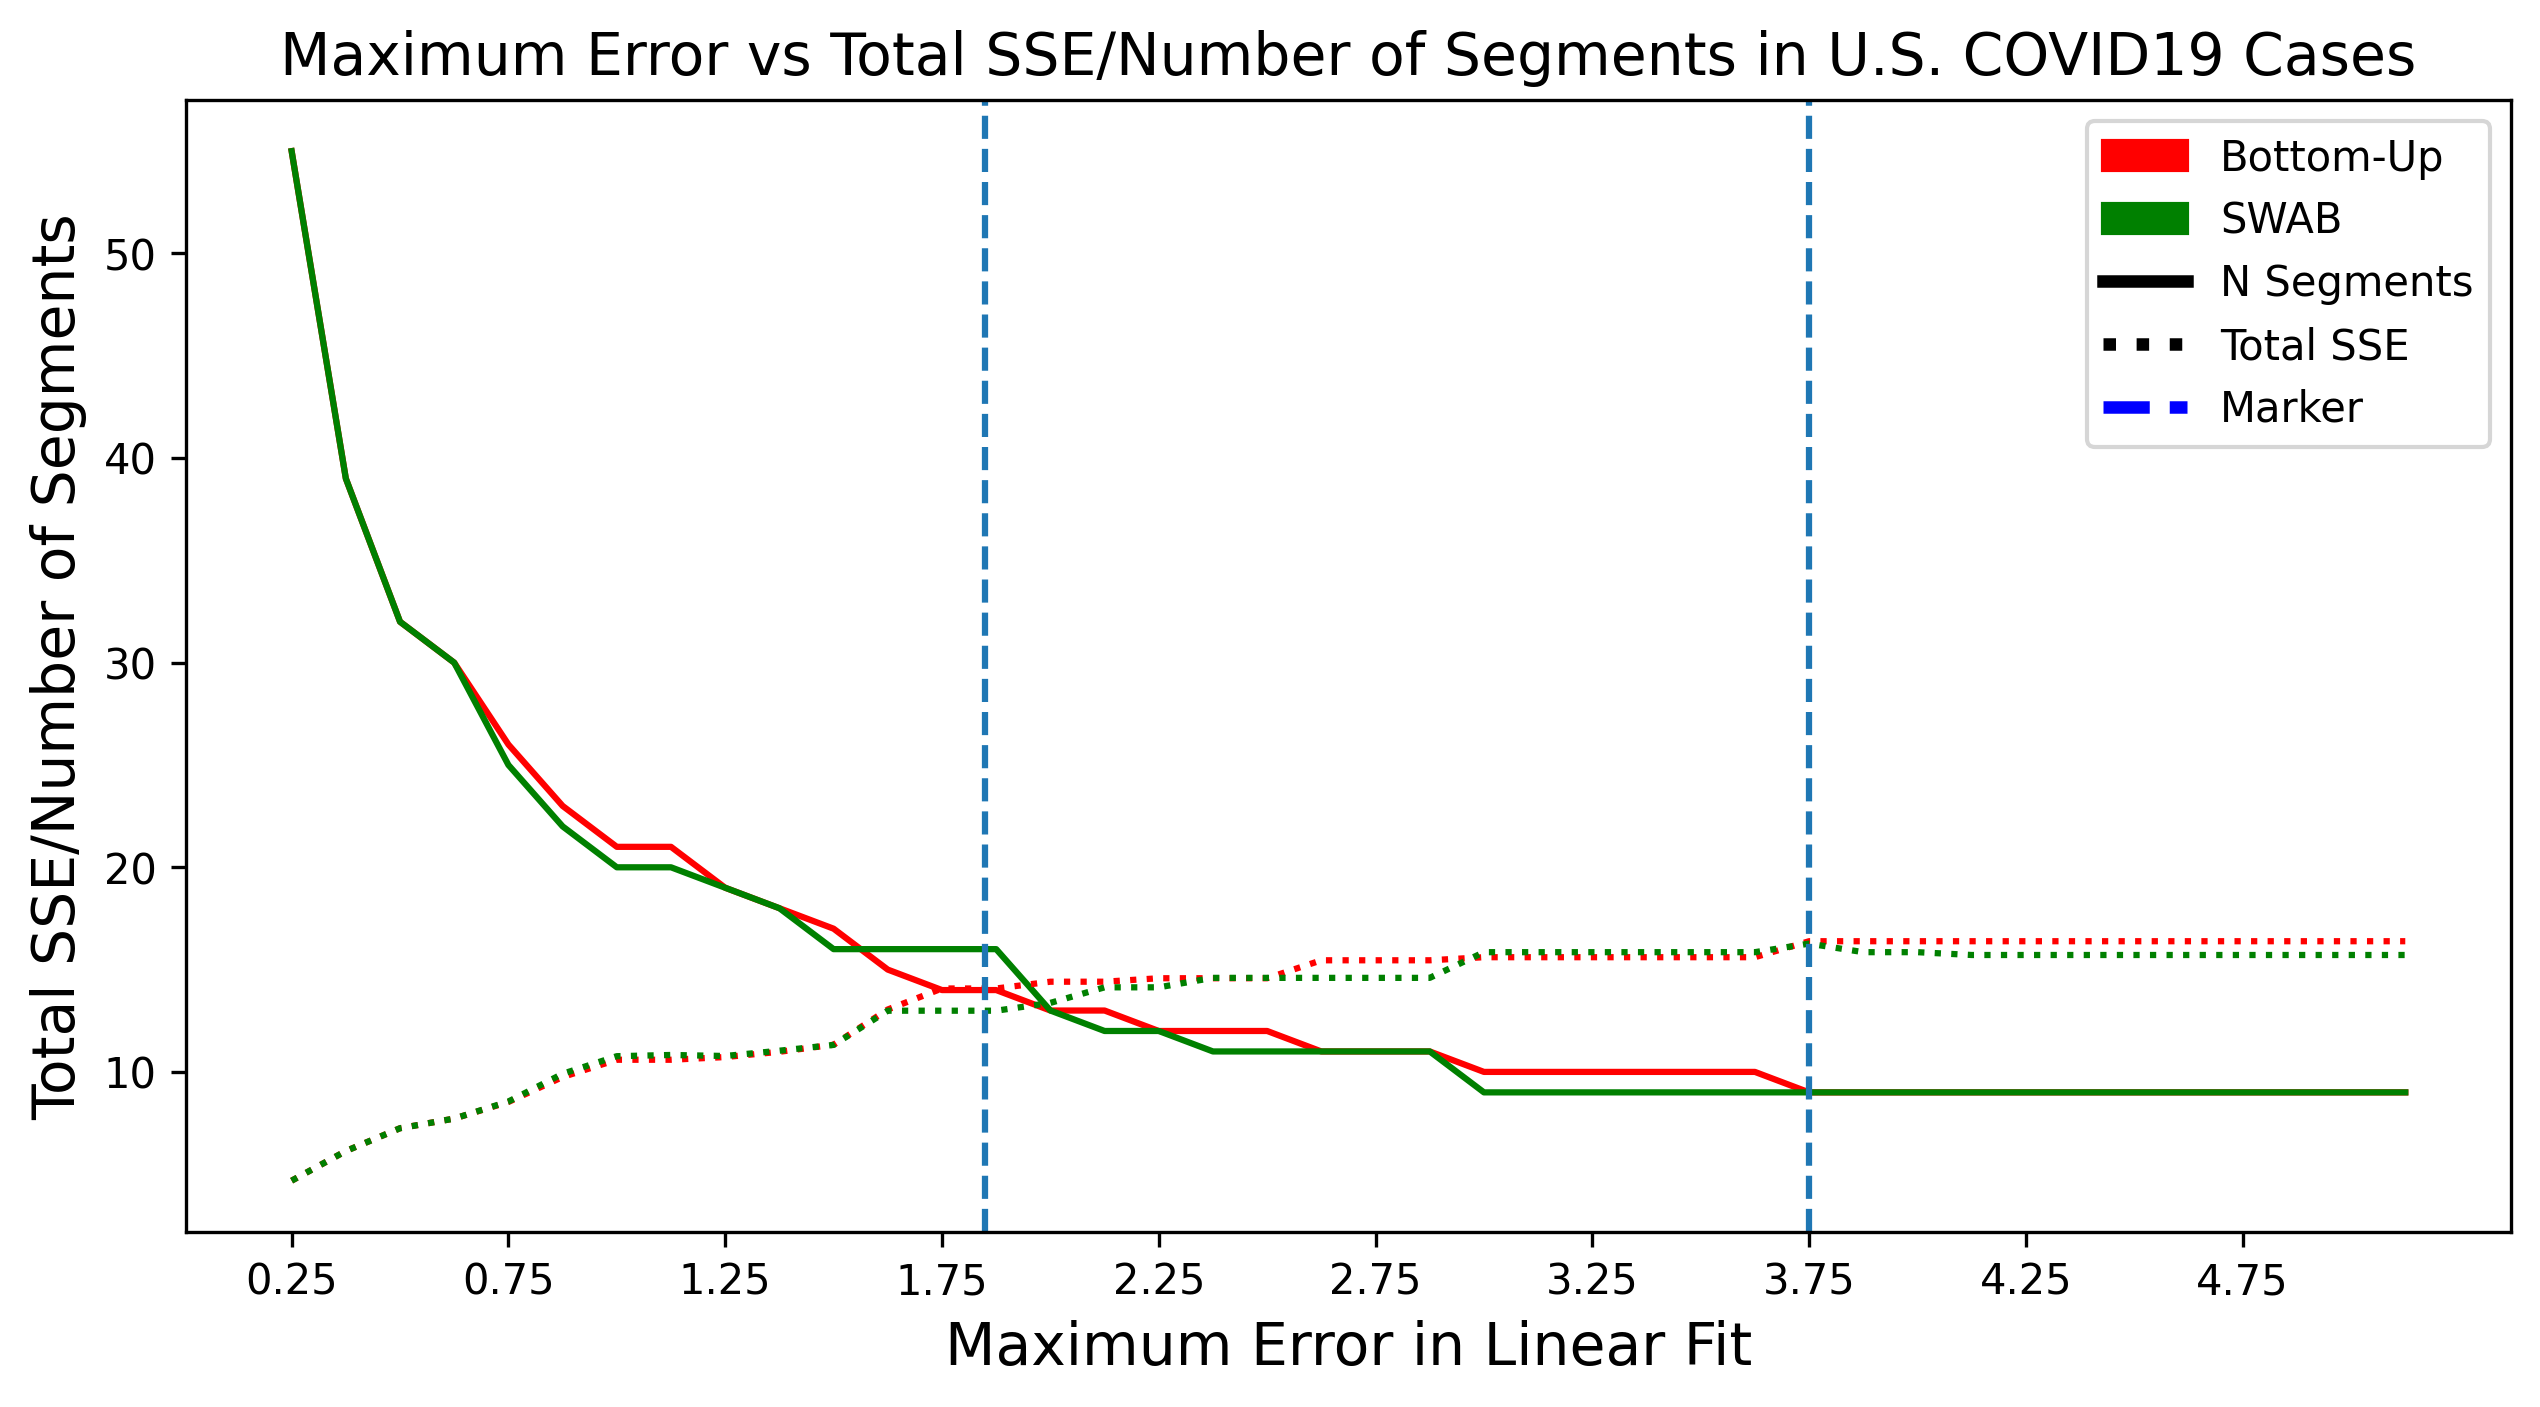

In [38]:
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
font = {'family': 'DejaVu Sans',
        'color':  'Black',
        'weight': 'normal',
        'size': 14,
        }
plt.figure(figsize=(10,5), dpi=300)
plt.plot(error_axis, bu_seg_c, 'r')
plt.plot(error_axis, swab_seg_c, 'g')
plt.plot(error_axis, bu_error_c, 'r:')
plt.plot(error_axis, swab_error_c, 'g:')
plt.xticks(np.arange(0.25,5.25,0.5))
plt.xlabel('Maximum Error in Linear Fit', fontdict=font)
plt.ylabel('Total SSE/Number of Segments',fontdict=font)
plt.title('Maximum Error vs Total SSE/Number of Segments in U.S. COVID19 Cases',fontdict=font)

red_patch = mpatches.Patch(color='r', label='Bottom-Up')
green_patch = mpatches.Patch(color='green', label='SWAB')
lines1 = Line2D([0], [0], color='black', linewidth=3, linestyle='-', label='N Segments')
lines2 = Line2D([0], [0], color='black', linewidth=3, linestyle=':', label= 'Total SSE')
lines3 = Line2D([0], [0], color='blue', linewidth=3, linestyle='--', label= 'Marker')
plt.axvline(x=1.85, ls='--')
plt.axvline(x=3.75, ls='--')

plt.legend(handles = [red_patch, green_patch, lines1, lines2, lines3], loc='upper right')